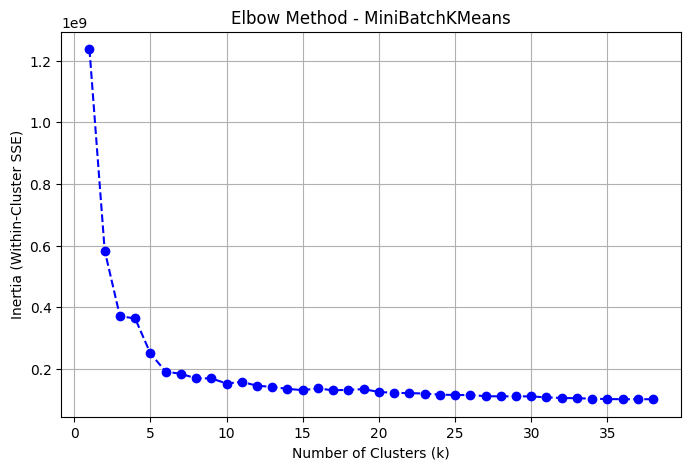

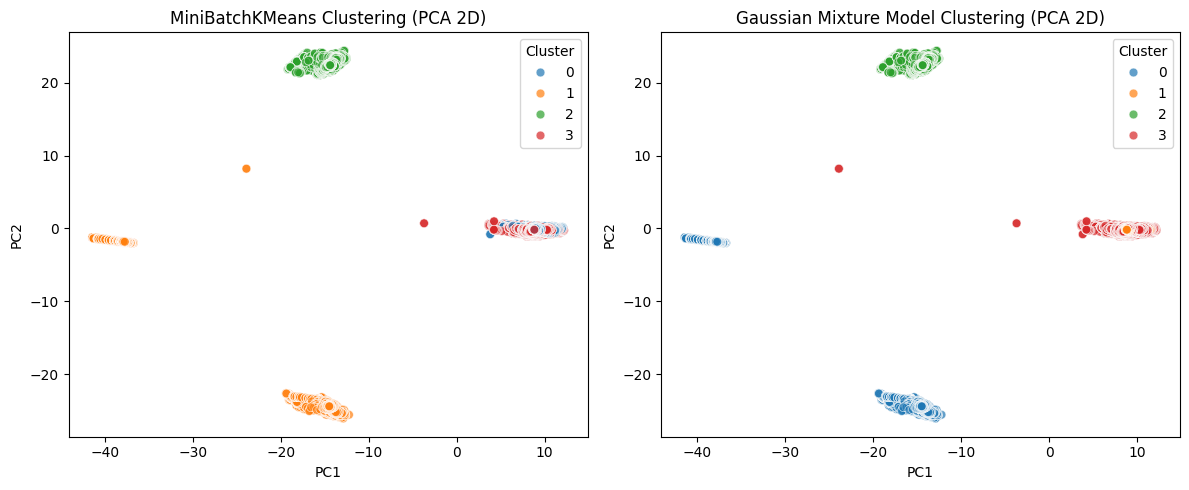

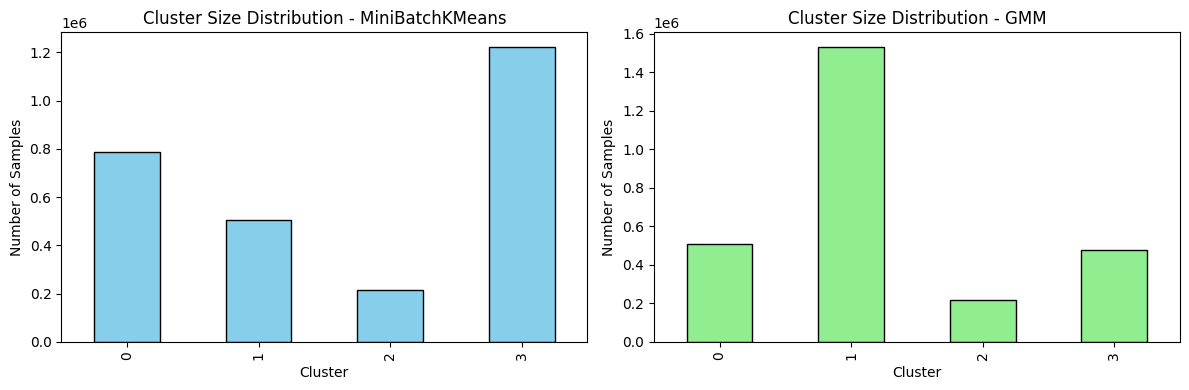

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

df_pca = pd.read_csv("df_pca.csv")
X_reduced = df_pca.values

cluster_map = {
    0: "Disengaged & Passive",
    1: "Stressed Reactors",
    2: "Calm & Resilient",
    3: "Highly Engaged Performers"
}

inertia_scores = []
K_range = range(1, 39)

for k in K_range:
    mbkm_temp = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=1000,
        max_iter=300
    )
    mbkm_temp.fit(X_reduced)
    inertia_scores.append(mbkm_temp.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_scores, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method - MiniBatchKMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.grid(True)
plt.show()

n_clusters = 4

mbkm = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=1000,
    max_iter=300
)
mbkm_labels = mbkm.fit_predict(X_reduced)

df_pca["MiniBatchKMeans"] = mbkm_labels
df_pca["MiniBatchKMeans_Category"] = df_pca["MiniBatchKMeans"].map(cluster_map)

gmm = GaussianMixture(
    n_components=n_clusters,
    covariance_type='full',
    random_state=42,
    max_iter=500
)
gmm_labels = gmm.fit_predict(X_reduced)

df_pca["GMM"] = gmm_labels
df_pca["GMM_Category"] = df_pca["GMM"].map(cluster_map)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(
    x=df_pca.iloc[:,0], y=df_pca.iloc[:,1],
    hue=df_pca["MiniBatchKMeans"],
    palette="tab10", s=40, alpha=0.7
)
plt.title("MiniBatchKMeans Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", loc="best")

plt.subplot(1,2,2)
sns.scatterplot(
    x=df_pca.iloc[:,0], y=df_pca.iloc[:,1],
    hue=df_pca["GMM"],
    palette="tab10", s=40, alpha=0.7
)
plt.title("Gaussian Mixture Model Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", loc="best")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df_pca["MiniBatchKMeans"].value_counts().sort_index().plot(
    kind='bar', color="skyblue", edgecolor="black"
)
plt.title("Cluster Size Distribution - MiniBatchKMeans")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")

plt.subplot(1,2,2)
df_pca["GMM"].value_counts().sort_index().plot(
    kind='bar', color="lightgreen", edgecolor="black"
)
plt.title("Cluster Size Distribution - GMM")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")

plt.tight_layout()
plt.show()

df_pca.to_csv("df_clusters_mapping.csv", index=False)
